PyQt i PySide téměř naprosto totožné, můžeme použít libovolnou z nich
- program bude fungovat v jakékoli verzi Qt (PyQt6, PySide6, PyQt5, PySide2)
- pouze dílčí nekompatibility
- stačí přepsat PySide6 na PyQt6

In [1]:
! pip install pyside6

In [ ]:
! pip install pyqt6

Základní objekty (v QtWidgets):
- QApplication (obsluha aplikace)
- QWidget (základní prázdný widget GUI)

Poznámka:
- mimo Jupyter notebook stačí vytvořit aplikaci pomocí app = QApplication(sys.argv)
- nutno testovat pouze v prostředí Jupyter notebooku

In [2]:
import sys      # pouze pro přístup k argumentům příkazové řádku
from PySide6.QtWidgets import QApplication, QWidget

# podmínka nutná v Jupyter notebook
app = QApplication.instance()       # potřebujeme právě jednu instanci QApplication
if app == None:
    app = QApplication(sys.argv)    # argumenty příkazové řádky (jde i QApplication([]))

window = QWidget()                  # vytvoří Qt widget (hlavní okno)
window.show()                       # zobrazí okno

app.exec()                          # spustí smyčku

# sem se dostaneme až po ukončení smyčky

0

In [3]:
import sys
from PySide6.QtWidgets import QApplication, QPushButton

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

window = QPushButton("Stiskni")     # místo okna vytvoří tlačítko
window.show()

app.exec()

0

In [4]:
import sys
from PySide6.QtWidgets import QApplication, QMainWindow

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

window = QMainWindow()              # předpřipravený widget
window.show()

app.exec()

0

Pro vytvoření vlastního okna je nejlepší vytvořit podtřídu QMainWindow
- nastavení okna vložíme do konstruktoru \__init__

In [5]:
import sys
from PySide6.QtCore import QSize, Qt
from PySide6.QtWidgets import QApplication, QMainWindow, QPushButton

# Subclass QMainWindow to customize your application's main window
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        #self.setFixedSize(QSize(500, 200))    # nastaví fixní velikost okna
        #self.setMinimumSize(QSize(500, 200))  # minimální velikost
        self.setMaximumSize(QSize(500, 200))  # maximální velikost
        
        self.setWindowTitle("Moje aplikace")         # název okna
        button = QPushButton("Stiskni!")     # tlačítko
        self.setCentralWidget(button)         # přidání tlačítka doprostřed okna

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

window = MainWindow()
window.show()

app.exec()

0

Layout, vložení Comboboxu

In [6]:
import sys
from PySide6.QtWidgets import QComboBox, QMainWindow, QApplication, QWidget, QVBoxLayout


class MainWindow(QMainWindow):

    def __init__(self):
        super().__init__()

        combobox1 = QComboBox()
        combobox1.addItem('One')
        combobox1.addItem('Two')
        combobox1.addItem('Three')
        combobox1.addItem('Four')

        combobox2 = QComboBox()
        combobox2.addItems(['One', 'Two', 'Three', 'Four'])

        layout = QVBoxLayout()
        layout.addWidget(combobox1)
        layout.addWidget(combobox2)

        container = QWidget()
        container.setLayout(layout)

        self.setCentralWidget(container)

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

w = MainWindow()
w.show()
app.exec()

0

Vyhodnocení signálů

In [7]:
import sys
from PySide6.QtWidgets import QComboBox, QMainWindow, QApplication


class MainWindow(QMainWindow):

    def __init__(self):                     # konstruktor
        super().__init__()

        combobox = QComboBox()
        combobox.addItems(['One', 'Two', 'Three', 'Four'])

        # Connect signals to the methods.
        combobox.activated.connect(self.activated)
        combobox.currentTextChanged.connect(self.text_changed)
        combobox.currentIndexChanged.connect(self.index_changed)

        self.setCentralWidget(combobox)

    def activated(self, index):             # index aktivované položky
        print("Activated index:", index)

    def text_changed(self, s):              # text změněné položky
        print("Text changed:", s)

    def index_changed(self, index):         # index změněné položky
        print("Index changed", index)

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

w = MainWindow()
w.show()
app.exec()

Index changed 2
Text changed: Three
Activated index: 2


0

## Grafy

Použití Qt a MatPlotLib

In [8]:
import sys
from PySide6.QtWidgets import QMainWindow, QApplication
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg
from matplotlib.figure import Figure

app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

# generování grafu
fig = Figure(figsize=(60,60), dpi=72, facecolor=(0.8,1,1), edgecolor=(0,0,0))
ax = fig.add_subplot(111)           # přidá graf s osami (jde i přes fig.add_axes)
ax.plot([0,1])                      # vykreslí úsečku

canvas = FigureCanvasQTAgg(fig)     # generování plátna pro zobrazení grafu

win = QMainWindow()                 # hlavní okno
win.setCentralWidget(canvas)        # přidá plátno do okna

win.show()
app.exec()
#sys.exit(app.exec())

0

Vytvoření vlastních tříd

In [9]:
import sys
from PySide6.QtWidgets import QMainWindow, QApplication
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg
from matplotlib.figure import Figure

class MplCanvas(FigureCanvasQTAgg):         # objekt maptlotlib FigureCanvas

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)


class MainWindow(QMainWindow):              # objekt hlavního okna

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        canvas = MplCanvas(self, width=5, height=4, dpi=100)
        canvas.axes.plot([0,1,2,3,4], [10,1,20,3,40])
        self.setCentralWidget(canvas)

        self.show()


app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

w = MainWindow()                            # hlavní okno
app.exec()

0

Dynamické grafy

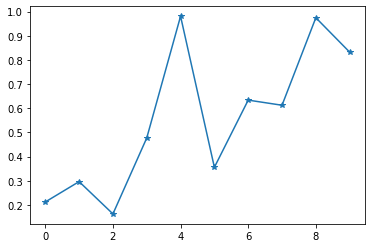

In [11]:
import sys
from PySide6.QtWidgets import QDialog, QApplication, QPushButton, QVBoxLayout
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt
import random
  
class Window(QDialog):                  # hlavní okno je dialog 
      
    def __init__(self, parent=None):
        super(Window, self).__init__(parent)

        self.figure = plt.figure()      # instance obrázku k vykreslení 

        # widget Canvas (zobrazuje 'figure', parametr 'figure')
        self.canvas = FigureCanvas(self.figure)     # widget canvas

        # navigační widget (parametry: Canvas widget a parent)
        self.toolbar = NavigationToolbar(self.canvas, self)

        self.button = QPushButton('Plot')           # tlačítko spojené s metodou 'plot'
        self.button.clicked.connect(self.plot)      # akce přidaná tlačítku

        layout = QVBoxLayout()                      # vertikální box
        layout.addWidget(self.toolbar)              # přidání toolbaru
        layout.addWidget(self.canvas)               # přidání canvasu
        layout.addWidget(self.button)               # přidání tlačítka
        self.setLayout(layout)                      # přidání layoutu do okna


    def plot(self):         # akce volaná po stisku tlačítka
        data = [random.random() for i in range(10)] # náhodná data
        self.figure.clear()                         # smazání starého obrázku
        ax = self.figure.add_subplot(111)           # vytvoření osy
        ax.plot(data, '*-')                         # vykreslení dat
        self.canvas.draw()                          # obnovení canvasu

if __name__ == '__main__':
    app = QApplication.instance()
    if app == None:
        app = QApplication(sys.argv)
  
    main = Window()                                 # objekt okna
    main.show()
  
    app.exec()

Gaussova křivka pomocí SciPy

In [13]:
import sys
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvas #QTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
from PySide6.QtWidgets import (
    QApplication,
    QWidget,
    QDoubleSpinBox,
    QVBoxLayout,
    QHBoxLayout,
)


class PlotWidget(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)

        #  widgety
        self.canvas = FigureCanvas(Figure(figsize=(5, 3)))
        self.axes = self.canvas.figure.subplots()
        self.toolbar = NavigationToolbar(self.canvas, self)
        self.mu_input = QDoubleSpinBox()
        self.std_input = QDoubleSpinBox()
        self.mu_input.setPrefix("μ: ")
        self.std_input.setPrefix("σ: ")
        self.std_input.setValue(10)

        #  layout
        input_layout = QHBoxLayout()
        input_layout.addWidget(self.mu_input)
        input_layout.addWidget(self.std_input)
        vlayout = QVBoxLayout()
        vlayout.addWidget(self.toolbar)
        #vlayout.addToolBar(self.toolbar)
        vlayout.addWidget(self.canvas)
        vlayout.addLayout(input_layout)
        self.setLayout(vlayout)

        # spojení vstupů s matodou on_change
        self.mu_input.valueChanged.connect(self.on_change)
        self.std_input.valueChanged.connect(self.on_change)

        self.on_change()

    def on_change(self):
        """ Aktualizace grafu současnými vstupnímu hodnotami """
        mu = self.mu_input.value()
        std = self.std_input.value()

        x = np.linspace(-100, 100)
        y = norm.pdf(x, mu, std)

        self.axes.clear()
        self.axes.plot(x, y)
        self.canvas.draw()


if __name__ == "__main__":

    app = QApplication.instance()
    if app == None:
        app = QApplication(sys.argv)    
    w = PlotWidget()
    w.show()
    app.exec()

In [13]:
import sys, time
import numpy as np

from matplotlib.backends.backend_qt5agg import (
    FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
from matplotlib.figure import Figure
from PyQt6.QtWidgets import QMainWindow, QApplication, QWidget, QVBoxLayout



class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self._main = QWidget()
        self.setCentralWidget(self._main)
        layout = QVBoxLayout(self._main)

        static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
        # Ideally one would use self.addToolBar here, but it is slightly
        # incompatible between PyQt6 and other bindings, so we just add the
        # toolbar as a plain widget instead.
        layout.addWidget(NavigationToolbar(static_canvas, self))
        layout.addWidget(static_canvas)

        dynamic_canvas = FigureCanvas(Figure(figsize=(5, 3)))
        layout.addWidget(dynamic_canvas)
        layout.addWidget(NavigationToolbar(dynamic_canvas, self))

        self._static_ax = static_canvas.figure.subplots()
        t = np.linspace(0, 10, 501)
        self._static_ax.plot(t, np.tan(t), ".")

        self._dynamic_ax = dynamic_canvas.figure.subplots()
        t = np.linspace(0, 10, 101)
        # Set up a Line2D.
        self._line, = self._dynamic_ax.plot(t, np.sin(t + time.time()))
        self._timer = dynamic_canvas.new_timer(50)
        self._timer.add_callback(self._update_canvas)
        self._timer.start()

    def _update_canvas(self):
        t = np.linspace(0, 10, 101)
        # Shift the sinusoid as a function of time.
        self._line.set_data(t, np.sin(t + time.time()))
        self._line.figure.canvas.draw()


app = QApplication.instance()
if app == None:
    app = QApplication(sys.argv)

w = MainWindow()
w.show()
w.activateWindow()
w.raise_()
app.exec()

0